# Metropolis Algorithm for discrete distribution

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
target_distr = [2, 5, 5, 1, 10]  # up to constant

In [7]:
x = [3]  # markov chain values

N = 1000  # chain length
n_rejects = 0
random.seed(22)

for _ in range(N):
    x_last = x[-1]
    proposal = (x_last + random.choice([-1, 1])) % len(target_distr)
    alpha = min(target_distr[proposal] / target_distr[x_last], 1)
    accept = random.random() <  alpha
    x_new = proposal if accept else x_last
    if not accept:
        n_rejects += 1
    x.append(x_new)
    
reject_ratio = n_rejects / N
print(f'reject_ratio={reject_ratio}')

reject_ratio=0.499


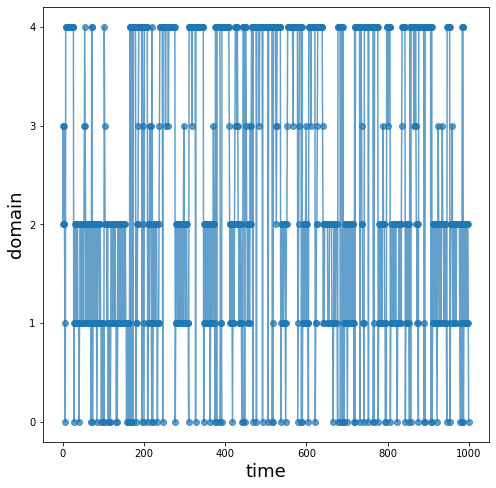

In [8]:
plt.figure(figsize=(8, 8))

plt.plot(range(len(x)), x, marker='o', alpha=.7)
plt.yticks(range(len(target_distr)))
plt.xlabel('time', fontsize=18)
plt.ylabel('domain', fontsize=18)#, rotation=0)
plt.show()

In [9]:
unq, cnt = np.unique(x, return_counts=True)
unq
mcmc_distr = cnt / cnt.sum()
print(mcmc_distr)

[0.08891109 0.22477522 0.23976024 0.04195804 0.4045954 ]


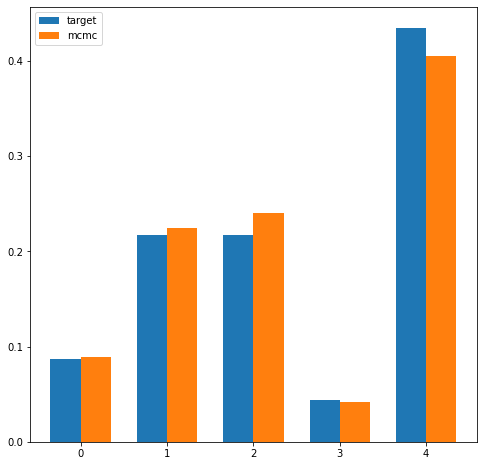

In [10]:
plt.figure(figsize=(8, 8))

values = np.arange(len(target_distr))
target_distr_exact = np.array(target_distr) / sum(target_distr)
width = 0.35

plt.bar(values - width/2, target_distr_exact, width, label='target')
plt.bar(values + width/2, mcmc_distr, width, label='mcmc')
plt.legend(loc='best')
plt.show()

# Metropolis Algorithm for bivariate normal

In [23]:
from scipy.stats import multivariate_normal, norm
# target

gt_mu = np.array([0, 0])
gt_Sigma = np.array([[1, -0.99], # -0.99
                     [-0.99, 1]])
target_distr = multivariate_normal(mean=gt_mu, cov=gt_Sigma)

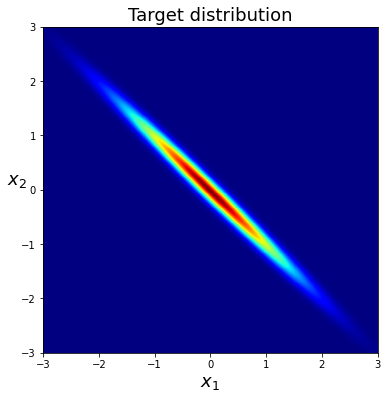

In [24]:
n_grid = 1000
x1 = np.linspace(-3, 3, n_grid)
x1_mg, x2_mg = np.meshgrid(x1, x1)
x_mg = np.stack((x1_mg, x2_mg), axis=-1)

plt.figure(figsize=(6, 6))
plt.title('Target distribution', fontsize=18)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18, rotation=0)
plt.pcolormesh(x1_mg, x2_mg, target_distr.pdf(x_mg), cmap='jet', shading='auto')
#plt.contour(x1_mg, x2_mg, target_distr.pdf(x_mg), cmap='jet', linewidths=1)
plt.show()

In [35]:
x1_chain = [-2]
x2_chain = [-2]  # inits

N = 1000 # length of chains

n_rejects = 0
random.seed(22)

proposal_mean = np.array([0,0])
proposal_sd = 0.5
proposal_cov = np.array([[proposal_sd**2, 0],
                         [0, proposal_sd**2]])
proposal_distr = multivariate_normal(mean=proposal_mean, 
                                     cov=proposal_cov)

for _ in range(N):
    x_last = np.array([x1_chain[-1], x2_chain[-1]])
    proposal = x_last + proposal_distr.rvs()
    alpha = min(target_distr.pdf(proposal) / target_distr.pdf(x_last), 1)
    accept = random.random() <  alpha
    x_new = proposal if accept else x_last
    if not accept:
        n_rejects += 1
    x1_chain.append(x_new[0])
    x2_chain.append(x_new[1])
    
reject_ratio = n_rejects / N
print(f'reject_ratio={reject_ratio}')

reject_ratio=0.294


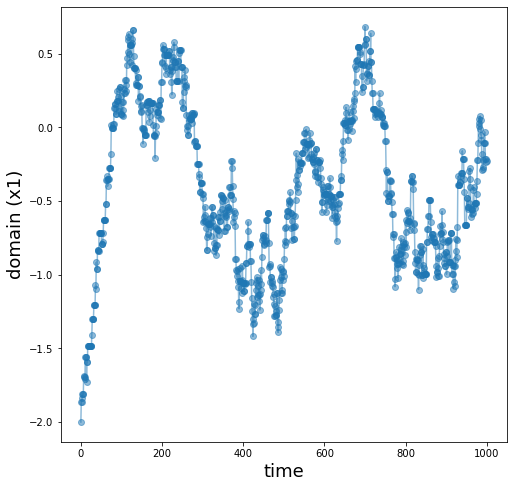

In [36]:
plt.figure(figsize=(8, 8))

plt.plot(range(len(x1_chain)), x1_chain, marker='o', alpha=.5)
plt.xlabel('time', fontsize=18)
plt.ylabel('domain (x1)', fontsize=18)
plt.show()

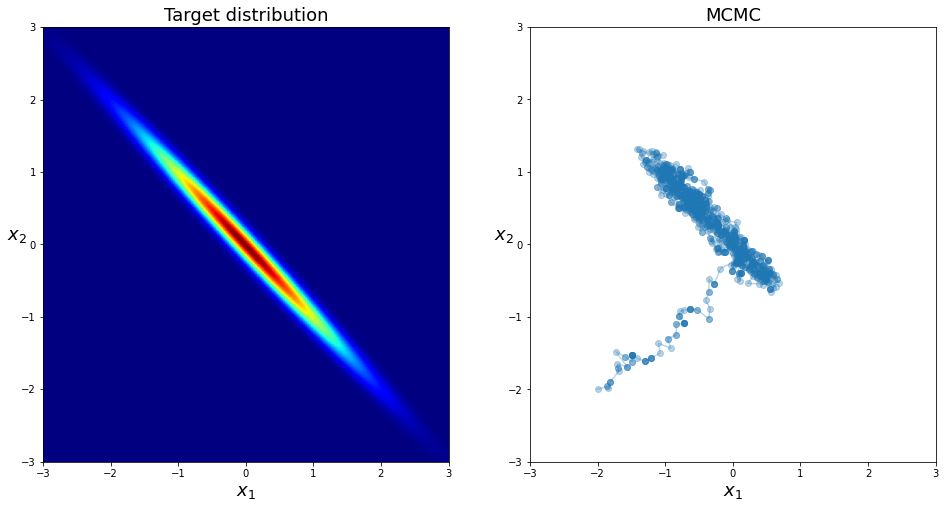

In [37]:
n_grid = 1000
x1 = np.linspace(-3, 3, n_grid)
x1_mg, x2_mg = np.meshgrid(x1, x1)
x_mg = np.stack((x1_mg, x2_mg), axis=-1)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.title('Target distribution', fontsize=18)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18, rotation=0)
plt.pcolormesh(x1_mg, x2_mg, target_distr.pdf(x_mg), cmap='jet', shading='auto')

plt.subplot(1, 2, 2)
plt.title('MCMC', fontsize=18)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', fontsize=18, rotation=0)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.plot(x1_chain, x2_chain, marker='o', alpha=.3)
#plt.contour(x1_mg, x2_mg, target_distr.pdf(x_mg), cmap='jet')
plt.show()

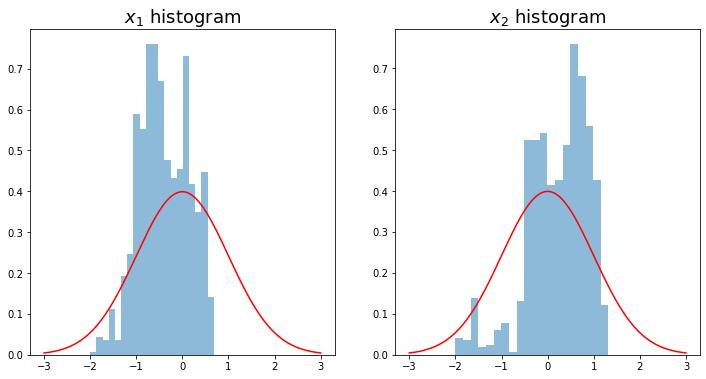

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('$x_1$ histogram', fontsize=18)
plt.hist(x1_chain, bins=20, density=True, alpha=0.5)
x_grid = np.linspace(-3, 3, 1000)
plt.plot(x_grid, norm.pdf(x_grid, loc=gt_mu[0], scale=np.sqrt(gt_Sigma[0,0])), color='red')

plt.subplot(1, 2, 2)
plt.title('$x_2$ histogram', fontsize=18)
plt.hist(x2_chain, bins=20, density=True, alpha=0.5)
plt.plot(x_grid, norm.pdf(x_grid, loc=gt_mu[1], scale=np.sqrt(gt_Sigma[1,1])), color='red')

plt.show()

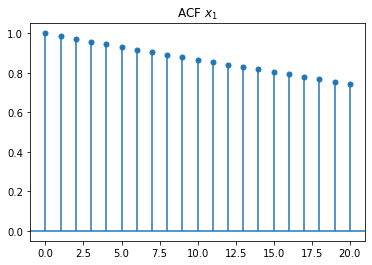

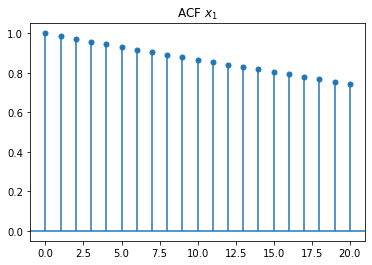

In [39]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(x1_chain, lags=20, alpha=None, title='ACF $x_1$')